In [2]:
from mne import Epochs, find_events, set_eeg_reference
from time import time, strftime, gmtime
import os
from utils import utils
from collections import OrderedDict
from glob import glob
import os
from collections import OrderedDict
from mne import create_info, concatenate_raws
from mne.io import RawArray
from mne.channels import read_montage
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
files = ['C:/Users/jdpig/BrainWaves Data/N170/Dano_0.csv']
sfreq=128
ch_ind = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
stim_ind = 14
replace_ch_names = None
raw = utils.load_csv_as_raw(files, sfreq, ch_ind, stim_ind, replace_ch_names)

['C:/Users/jdpig/BrainWaves Data/N170/Dano_0.csv']
Creating RawArray with float64 data, n_channels=15, n_times=16521
    Range : 0 ... 16520 =      0.000 ...   129.062 secs
Ready.


In [9]:
## Filtering Data

# Input
low_cutoff = 1
high_cutoff = 30

# Computation
raw.filter(low_cutoff, high_cutoff, method='iir');

Setting up band-pass filter from 1 - 30 Hz


In [10]:
## Epoch Data

# Input
event_id = {'House': 3, 'Face': 4}
tmin=-0.1
tmax=0.8
baseline = (tmin, tmax)
picks = None
reject = None

# Computation
events = find_events(raw)
# TODO: Figure out how to normalize and auto-reject Emotiv EEG data
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=tmin, tmax=tmax, baseline=baseline, reject=reject, preload=True, 
                verbose=False, picks=picks)

# Output
{"totalEpochs": len(epochs.events), "dropPercentage": (1 - len(epochs.events)/len(events)) * 100, **{x: len(epochs[x]) for x in event_id}}

171 events found
Event IDs: [2 3 4]


{'totalEpochs': 170,
 'dropPercentage': 0.5847953216374324,
 'House': 81,
 'Face': 89}

c:\users\jdpig\miniconda3\envs\brainwaves\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


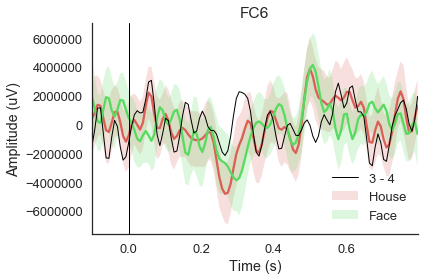

In [18]:
## Plot ERPs

# Input
ch_ind = 10

# Computation
conditions = OrderedDict({key: [value] for (key, value) in event_id.items()})

# Output
X, y = utils.plot_conditions(epochs, ch_ind=ch_ind, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',)

In [ ]:
{'House': 3, 'Face': 4}.items()